# Einführung in das Symbolische Rechnen

Das symbolische Rechnen erlaubt es uns, genaue Berechnungen mit Computern durchzuführen, ohne Näherungsfehler. Es ist ein sehr leistungsfähiges Werkzeug, das für die Lösung von Übungsaufgaben sehr zu empfehlen ist. Dieses Notebook dient als Einführung in diese Themen und zum Verständnis der Lösungen für die Übungen in den folgenden Notebooks.

### Symbolische Variablen

Symbolische Variablen funktionieren in Python anders als normale Variablen. Sie werden mathematisch betrieben und während der Berechnung beibehalten.

In [1]:
# Import the SymPy package for symbolic calculation
"""
    Another way to do this is 'import sympy as sym'. The difference is that init_session declare some
    useful variables (see printed text below) and most important, it allows us to print beautiful
    outputs using LaTeX. However, it can be manually done with 'init_printing()'.
"""
from sympy import init_session

init_session(use_latex=True)

IPython console for SymPy 1.4 (Python 3.7.4-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [2]:
# Define a symbolic variable
x = symbols('x')

# Show the type of variable x
type(x)

sympy.core.symbol.Symbol

In [3]:
# What if we add a number to x?
x + 1

In [4]:
# We can use pre-defined constants like pi or e
(x + pi)**2

In [5]:
# Note that the Euler's number as some other constants should be written in upper case.
x + E**2

Die Ausgaben können in Form von Latex-Gleichungen exportiert werden. Die Schritte sind:
    
    Right click on the ecuation > Show Math As > TeX Commands

In [6]:
# Declare a complex number
3 + 4*I

### Annahmen und Vereinfachung

Wir können Eigenschaften der Variablen angeben, zum Beispiel, ob sie reell positiv sind. Auf diese Weise erhalten wir Vereinfachungen, Integrationen usw., die den von uns gewünschten näher kommen. Wenn wir zum Beispiel versuchen, $\sqrt{x^2}$ zu vereinfachen, wäre das Ergebnis identisch, sofern wir nicht angeben, dass x real ist, in welchem Fall das Ergebnis $|x|$ wäre. Wenn wir weiter spezifizieren, dass $x$ positiv ist, dann ist $$\sqrt{x^2} = x$$

In [9]:
x.assumptions0 # We have not make any assumption yet

{'commutative': True}

Wir können die Funktion "simplify( )" verwenden, um einen Ausdruck zu vereinfachen.

In [38]:
simplify(sqrt(x**2))

In [39]:
# Let us assume that x is real
x = symbols('x', real=True)

simplify(sqrt(x**2))

In [41]:
# Let us assume that x is real and positive
x = symbols('x', real=True, positive=True)

simplify(sqrt(x**2))

In [45]:
# simplify() can be performed on trigonometric expressions as well
theta = symbols('theta')
expr = cos(theta)**2 + sin(theta)**2
simplify(expr)

### .subs()

Wir können eine symbolische Variable durch eine andere Variable oder einen anderen Ausdruck ersetzen, indem wir die Methode .subs() verwenden.

Wenn wir beispielsweise die Substitution $$\theta = \omega \cdot t$$ durchführen wollen.

In [49]:
omega, t = symbols('omega t')
expr.subs(theta, omega*t) # First argument is the variable to be substituted, second is the substitution

In [52]:
# Numbers can be used as well. This is a way to evaluate a expression (see next section)
expr.subs(theta, pi)

In [53]:
# Note that this does not overwrite the expression
expr

In [55]:
# Use a variable assignation to overwrite the expression
expr = expr.subs(theta, omega*t)
expr

### Auswertung

Im Folgenden werden verschiedene Möglichkeiten zur Auswertung eines Ausdrucks beschrieben.

In [81]:
# Define a new expression
expr2 = exp(x) + 1

# Evaluate using .subs() and replacing symbolic variables for numbers
expr2.subs(x, pi/2)

Damit bleibt die symbolische Ausdrucksform erhalten. Im Folgenden befinden sich Möglichkeiten zur numerischen Auswertung.

In [82]:
# Using .evalf()
expr2 = expr2.subs(x, pi/2)
expr2.evalf()

In [83]:
# Using N()
N(expr2)

### Funktionen zur Manipulation von Ausdrücken

Es gibt mehrere Funktionen, mit denen Sie Ausdrücke nach Belieben ändern können. Die folgenden sind relevante Beispiele.

In [5]:
x, y, z = symbols('x y z')

#### expand(expr)

Diese Funktion erweitert den Ausdruck.

In [8]:
((x**3 + 3*y + 2)**2).expand()

In [10]:
expand((x**3 + 3*y + 2)**2) # This is equivalent

#### apart(expr)

Diese Funktion führt eine partielle Fraktionszerlegung an einem rationalen mathematischen Ausdruck durch.

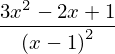

In [9]:
(3*x**2 - 2*x + 1)/(x - 1)**2

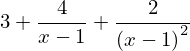

In [11]:
((3*x**2 - 2*x + 1)/(x - 1)**2).apart()

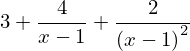

In [12]:
apart((3*x**2 - 2*x + 1)/(x - 1)**2) # This is again equivalent

#### factor(expr)

Diese Funktion faktorisiert den Ausdruck.

In [13]:
(x**3 + 9*x**2 + 27*x + 27)

In [14]:
(x**3 + 9*x**2 + 27*x + 27).factor()

In [15]:
factor(x**3 + 9*x**2 + 27*x + 27)

#### Trigonometrisch ausmultiplizieren

Es gibt zwei verschiedene Möglichkeiten, einen Ausdruck trigonometrisch zu erweitern, und sie funktionieren leicht unterschiedlich. Betrachten wir das Verhalten des folgenden trigonometrischen Ausdrucks.

In [16]:
sin(x + 2*y)

    1. expand(expr, trig=True)

Durch das Flag 'trig=True' werden die entsprechenden trigonometrischen Substitutionen vorgenommen, und dann wird der Ausdruck erweitert.

In [17]:
expand(sin(x + 2*y), trig=True)

    2. expand_trig(expr)

Hier werden die zuvor vorgenommenen trigonometrischen Substitutionen durchgeführt, aber der Ausdruck wird nicht erweitert.

In [18]:
expand_trig(sin(x + 2*y))

Die beiden Ausdrücke sind gleichwertig, aber nicht identisch. Wenn wir später 'expand()' verwenden, erhalten wir dasselbe Ergebnis.

In [21]:
expand_trig(sin(x + 2*y)).expand()
# or equivalently
expand(expand_trig(sin(x + 2*y)))

### Ableitungen

Symbolische Ausdrücke können abgeleitet werden. Dazu verwenden wir die Methode 'expr.diff(var)' oder die Funktion 'Derivative(expr, var)', wobei 'expr' der symbolische Ausdruck und 'var' die Variable ist, von der wir uns ableiten.

    1. Derivative(expr, var) ergibt die Ableitung der symbolischen Funktion, ohne ausgewertet zu werden. Um sie auszuwerten, wird die Methode .doit() verwendet.

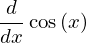

In [3]:
# Define expressions
expr1 = cos(x)
expr2 = sin(2*x + y**2)

# Derive the first expression with respect x
der_expr1 = Derivative(expr1, x)
der_expr1

In [6]:
# Evaluate der_expr1
der_expr1.doit()

    2. expr.diff(var) hat als Ausgabe die Ableitung des bereits ausgewerteten Ausdrucks.

In [7]:
# Derive the first expression with respect x
expr1.diff(x)

In [27]:
# Derive the second expression with respect x
expr2.diff(x)

In [28]:
# Derive the second expression with respect y
expr2.diff(y)

####  Mehrfach Ableitungen

Wir können auch mehrere Ableitungen durchführen. Die verschiedenen Wege sind die folgenden.

In [8]:
# Derive 2 times the same variable
expr2.diff(x, x)
# Or equivalently
expr2.diff(x, 2)

In [10]:
# This can be done for any number of derivatives
expr2.diff(x, x, x, x)
# or
expr2.diff(x, 4)

In [11]:
# It is similar for different variables
expr2.diff(x, y)

In [12]:
expr2.diff(x, x, y, y, y) # This is 2 derivatives with respect to x and 3 with respect to y

In [13]:
# Or equivalently
expr2.diff(x, 2, y, 3)

### Integrale

Mit SymPy können wir Ausdrücke integrieren. Die Vorgehensweise wird im Folgenden erläutert. Bedenken Sie, dass SymPy möglicherweise nicht in der Lage ist, einige sehr komplexe Integrale durchzuführen.

In [4]:
# We'll keep using the expressions from last section
expr1

In [5]:
expr2

In [17]:
# Indefinite integral of expr1
integrate(expr1, x)
# or equivalently (for 1 variable expressions)
integrate(expr1)

In [14]:
# If you specify the integration interval, you'll get the definite integral
integrate(expr1, (x,0, pi/3))

In [16]:
# It is important to specify the variable of integration, if the expression have more than one variable as in expr2
integrate(expr2) # <-- ERROR expected due to ambiguity

ValueError: specify dummy variables for sin(2*x + y**2)

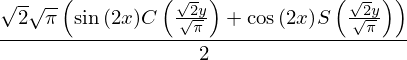

In [20]:
# Instead, specify the variable
integrate(expr2, y)

# TODO:
    Add Equations and solvers.